# Đồ Án Khám Phá Gian Lận Điểm Thi THPT QG 2018

## THÔNG TIN THÀNH VIÊN

| MSSV | HỌ VÀ TÊN |
|:------:|:--------:|
|18120184 |	Nguyễn Nguyên Khang |
|18120210 | Phạm Tống Bình Minh |
|18120237 | Bạch Tăng Thắng |
|18120264 | Nguyễn Duy Vũ |
|18120283 | Nguyễn Chiêu Bản |

## Mục Lục
- [import](#import)
- [Đọc dữ liệu](#Đọc-dữ-liệu)
- [Khám phá dữ liệu Và Tiền xử lý](#Khám-phá-dữ-liệu-Và-Tiền-xử-lý)
    - [Xử lý kiểu dữ liệu cột](#Xử-lý-kiểu-dữ-liệu-cột)
    - [Xử lý dữ liệu trùng nhau](#Xử-lý-dữ-liệu-trùng-nhau)
    - [Thêm cụm thi](#Thêm-cụm-thi)
    - [Phân bố điểm của cả nước](#Phân-bố-điểm-của-cả-nước)
- [Phân tích gian lận](#Phân-tích-gian-lận)
    - [Phân bố điểm của cụm thi Hà Giang](#Phân-bố-điểm-của-cụm-thi-Hà-Giang)
    - [Phân bố điểm của cụm thi Hà Nội](#Phân-bố-điểm-của-cụm-thi-Hà-Nội)
    - [Phân bố điểm của cụm thi TP. Hồ Chí Minh](#Phân-bố-điểm-của-cụm-thi-TP.-Hồ-Chí-Minh)
    - [So Sánh Điểm Toán](#So-Sánh-Điểm-Toán)
    - [Các biểu đồ chỉ ra sự gian lận](#Ta-thử-vẽ-biểu-đồ:)
        - [Phần Trăm Điểm Toán Trên 9.0](#Phần-Trăm-Điểm-Toán-Trên-9.0)
        - [Phần Trăm Điểm Toán Cụm Hà Giang Và Cả Nước](#Phần-Trăm-Điểm-Toán-Trên-9.0)
        - [Phân bố điểm và outlier của Hà Giang và một số tỉnh phía Bắc bằng biểu đồ hộp](#Phân-bố-điểm-và-outlier-của-Hà-Giang-và-một-số-tỉnh-phía-Bắc-bằng-biểu-đồ-hộp)
        - [Phổ điểm môn Lý của Hà Giang](#Tiếp-theo-ta-quan-sát-phổ-điểm-môn-Lý-của-Hà-Giang)
        - [Phần Trăm Điểm Các Khối Trên 27](#Phần-Trăm-Điểm-Các-Khối-Trên-27)
- [Kết Luận](#Kết-luận)
        

## import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import Image, display

In [2]:
#Set Option
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_theme()

## Đọc dữ liệu

Nếu chưa gom file ta bỏ comment cell dưới

In [3]:
df = pd.DataFrame()
for i in range(1,64):
    df = df.append(pd.read_csv(f'Data/{i}.csv'),ignore_index = True, sort= False)


In [4]:
df_HaGiang = pd.read_csv('Data/4.csv')
df_HaNoi = pd.read_csv('Data/1.csv')
df_HCM = pd.read_csv('Data/2.csv')

In [5]:
# df = pd.read_csv('Data/fullData.csv')

## Khám phá dữ liệu Và Tiền xử lý

In [6]:
df.head()

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
0,1063438,3.0,3.5,2.75,3.25,2.75,2.50,5.50,5.50,2.6,2.92,4.50,9.0,9.00,11.50,9.1,8.35
1,1063463,4.0,3.0,2.75,3.75,4.50,1.50,5.00,5.75,3.0,3.67,4.08,10.5,12.25,9.50,10,9.75
2,1063464,5.0,3.0,3.75,2.25,3.50,3.50,5.75,5.75,3.0,3.17,5.00,11.0,10.75,12.25,11,11.75
3,1063470,2.6,4.5,2.00,3.50,3.25,1.75,4.25,6.25,3.0,2.92,4.08,8.1,9.35,10.50,10.1,7.60
4,1063477,3.2,5.0,2.00,3.00,3.00,2.50,4.00,7.00,3.4,2.67,4.50,8.2,9.20,11.50,11.6,8.60


In [7]:
#Xem kích thước dữ liệu và kiểu dữ liệu của từng cột
print(df.shape)
print(df.info())

(844122, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844122 entries, 0 to 844121
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   SBD      844122 non-null  int64  
 1   TOÁN     840264 non-null  float64
 2   VĂN      826061 non-null  float64
 3   LÝ       361908 non-null  float64
 4   HÓA      365827 non-null  float64
 5   SINH     357544 non-null  float64
 6   SỬ       512711 non-null  float64
 7   ĐỊA      497523 non-null  float64
 8   GDCD     434021 non-null  float64
 9   ANH      745755 non-null  float64
 10  KHTN     352736 non-null  float64
 11  KHXH     428493 non-null  float64
 12  KHỐI A   359525 non-null  float64
 13  KHỐI B   357439 non-null  float64
 14  KHỐI C   496866 non-null  float64
 15  KHỐI D   741766 non-null  object 
 16  KHỐI A1  344135 non-null  float64
dtypes: float64(15), int64(1), object(1)
memory usage: 109.5+ MB
None


### Xử lý kiểu dữ liệu cột

In [8]:
# Kiểm tra cột KHỐI D có kiểu Object

# for iii in df['KHỐI D'].unique():
#     print(iii)
df[df['KHỐI D'] == '#VALUE!']['TOÁN'].unique()
#Khối D gồm toán văn anh, kiểm tra thấy các thí sinh khối D có giá trị lạ: #VALUE! thì toán là giá trị rỗng, 
#vậy ta có thể đổi các giá trị này thành nan

array([nan])

In [9]:
def convert_col_dtype(col):
    return float(col)

In [10]:
df['KHỐI D'] = df['KHỐI D'].replace('#VALUE!',np.nan)
df['KHỐI D'] = df['KHỐI D'].apply(convert_col_dtype)

In [11]:
df_HaNoi['KHỐI D'] = df_HaNoi['KHỐI D'].replace('#VALUE!',np.nan)
df_HaNoi['KHỐI D'] = df_HaNoi['KHỐI D'].apply(convert_col_dtype)
df_HCM['KHỐI D'] = df_HCM['KHỐI D'].replace('#VALUE!',np.nan)
df_HCM['KHỐI D'] = df_HCM['KHỐI D'].apply(convert_col_dtype)

### Xử lý dữ liệu trùng nhau

In [12]:
#Xem các dữ liệu có trùng nhau không
dups = df.pivot_table(index = ['SBD'], aggfunc ='size')
print(dups[dups>1])

SBD
40000001    2
40000002    2
40000003    2
40000004    2
40000005    2
           ..
40022184    2
40022185    2
40022186    2
40022187    2
40022188    2
Length: 22035, dtype: int64


In [13]:
# Xem 1 dòng dữ liệu trùng nhau
df[df['SBD'] == 40000005] 

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
246856,40000005,6.0,6.0,NaN,NaN,NaN,3.75,6.25,8.25,6.2,NaN,6.08,NaN,NaN,16.0,18.2,NaN
573528,40000005,6.0,6.0,NaN,NaN,NaN,3.75,6.25,8.25,6.2,NaN,6.08,NaN,NaN,16.0,18.2,NaN


In [14]:
# Xóa dữ liệu trùng nhau (dữ liệu trùng nhau gây ra bởi file 14.csv)
df.drop_duplicates(inplace=True)

### Thêm cụm thi

In [15]:
# Thêm cụm thi vào dataframe
dict_cumthi = {1: "Hà Nội",2: "TP. Hồ Chí Minh",3: "Hải Phòng",4: "Đà Nẵng",5: "Hà Giang",6: "Cao Bằng",7: "Lai Châu",8: "Lào Cai",9: "Tuyên Quang",10: "Lạng Sơn",11: "Bắc Kạn",12: "Thái Nguyên",13: "Yên Bái",14: "Sơn La",15: "Phú Thọ",16: "Vĩnh Phúc",17: "Quảng Ninh",18: "Bắc Giang",19: "Bắc Ninh",21: "Hải Dương",22: "Hưng Yên",23: "Hoà Bình",24: "Hà Nam",25: "Nam Định",26: "Thái Bình",27: "Ninh Bình",28: "Thanh Hoá",29: "Nghệ An",30: "Hà Tĩnh",31: "Quảng Bình",32: "Quảng Trị",33: "Thừa Thiên -Huế",34: "Quảng Nam",35: "Quảng Ngãi",36: "Kon Tum",37: "Bình Định",38: "Gia Lai",39: "Phú Yên",40: "Đắk Lắk",41: "Khánh Hoà",42: "Lâm Đồng",43: "Bình Phước",44: "Bình Dương",45: "Ninh Thuận",46: "Tây Ninh",47: "Bình Thuận",48: "Đồng Nai",49: "Long An",50: "Đồng Tháp",51: "An Giang",52: "Bà Rịa-Vũng Tàu",53: "Tiền Giang",54: "Kiên Giang",55: "Cần Thơ",56: "Bến Tre",57: "Vĩnh Long",58: "Trà Vinh",59: "Sóc Trăng",60: "Bạc Liêu",61: "Cà Mau",62: "Điện Biên",63: "Đăk Nông",64: "Hậu Giang",65: "Cục Nhà trường - Bộ Quốc phòng"}
df["CỤM"] = df["SBD"].apply(lambda x: dict_cumthi[int(x/1_000_000)])

In [16]:
# Xem số lượng thí sinh ở từng cụm
df.groupby(["CỤM"])["SBD"].agg('count')

CỤM
An Giang           16359
Bà Rịa-Vũng Tàu    11846
Bình Dương         11313
Bình Phước         10219
Bình Thuận         11716
Bình Định          17785
Bạc Liêu            5370
Bắc Giang          19612
Bắc Kạn             2866
Bắc Ninh           14815
Bến Tre            11740
Cao Bằng            4571
Cà Mau              9275
Cần Thơ            13068
Gia Lai            12825
Hoà Bình            8952
Hà Giang            3099
Hà Nam              8685
Hà Nội             79092
Hà Tĩnh            16330
Hưng Yên           12888
Hải Dương          19973
Hải Phòng           5099
Hậu Giang           6190
Khánh Hoà          13500
Kiên Giang         13482
Kon Tum             4445
Lai Châu            3232
Long An            14065
Lào Cai             6199
Lâm Đồng           14985
Lạng Sơn            9013
Nam Định            5099
Nghệ An              199
Ninh Bình           9612
Ninh Thuận          5774
Phú Thọ            13699
Phú Yên            10731
Quảng Bình          9623
Quảng Nam          17

In [17]:
df

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1,CỤM
0,1063438,3.0,3.50,2.75,3.25,2.75,2.50,5.50,5.50,2.6,2.92,4.50,9.00,9.00,11.50,9.10,8.35,Hà Nội
1,1063463,4.0,3.00,2.75,3.75,4.50,1.50,5.00,5.75,3.0,3.67,4.08,10.50,12.25,9.50,10.00,9.75,Hà Nội
2,1063464,5.0,3.00,3.75,2.25,3.50,3.50,5.75,5.75,3.0,3.17,5.00,11.00,10.75,12.25,11.00,11.75,Hà Nội
3,1063470,2.6,4.50,2.00,3.50,3.25,1.75,4.25,6.25,3.0,2.92,4.08,8.10,9.35,10.50,10.10,7.60,Hà Nội
4,1063477,3.2,5.00,2.00,3.00,3.00,2.50,4.00,7.00,3.4,2.67,4.50,8.20,9.20,11.50,11.60,8.60,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844117,61002654,5.6,6.25,3.00,5.75,3.25,NaN,NaN,NaN,3.2,4.00,NaN,14.35,14.60,NaN,15.05,11.80,Cà Mau
844118,61003116,6.6,5.50,5.25,5.75,6.00,NaN,NaN,NaN,4.4,5.67,NaN,17.60,18.35,NaN,16.50,16.25,Cà Mau
844119,61003743,6.2,7.25,4.75,6.50,5.25,NaN,NaN,NaN,5.4,5.50,NaN,17.45,17.95,NaN,18.85,16.35,Cà Mau
844120,61003786,5.8,8.75,NaN,NaN,NaN,4.50,7.50,8.50,4.6,NaN,6.83,NaN,NaN,20.75,19.15,NaN,Cà Mau


In [18]:
# df.to_csv('fullData.csv',index = False)

### Phân bố điểm của cả nước

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Kết quả được lưu vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `items_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" 

In [19]:
numeric_df = df.select_dtypes(exclude='object')
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)
num_col_info_df = numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
num_col_info_df

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
missing_ratio,0.0,0.5,2.1,57.2,56.7,57.7,39.2,41.0,48.5,11.6,58.3,49.2,57.5,57.7,41.1,12.1,59.3
min,1000019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,12000293.5,3.8,4.5,3.8,3.8,3.8,3.0,4.8,6.5,2.8,4.0,4.8,12.8,12.8,12.2,12.0,12.5
median,30008007.0,5.0,5.5,5.0,4.8,4.5,3.8,5.5,7.2,3.6,4.8,5.5,15.6,15.0,14.5,14.2,14.8
upper_quartile,47004683.5,6.0,6.5,6.0,6.0,5.2,4.5,6.2,8.0,4.6,5.6,6.2,18.0,17.2,16.5,16.6,17.3
max,64006216.0,10.0,9.8,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.3,9.6,29.0,29.6,28.5,27.8,29.0


## Phân tích gian lận

So sánh phần trăm các thí sinh:
1. Đạt trên 27 điểm các khối
2. Đạt trên 9 điểm các môn

của cụm thi nghi ngờ với: 
1. Cả nước (với hy vọng không có nhiều tỉnh sửa điểm)
2. Hai cụm có số lượng thí sinh cao nhất: Hà Nội và TP Hồ Chí Minh


### Phân bố điểm của cụm thi Hà Giang

In [20]:
HG_numeric_df = df_HaGiang.select_dtypes(exclude='object')
HG_num_col_info_df = HG_numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
HG_num_col_info_df

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
missing_ratio,0.0,0.3,1.7,80.8,80.9,81.6,11.8,13.4,18.1,6.8,81.9,18.1,81.3,81.6,13.6,7.6,81.5
min,5000001.0,1.0,0.5,1.0,0.8,1.2,0.8,0.0,1.0,0.6,1.8,1.9,4.8,5.2,3.5,4.6,5.4
lower_quartile,5001695.5,2.6,3.2,2.8,2.8,3.2,2.8,3.8,5.2,2.4,3.1,4.1,8.8,9.6,10.2,8.7,8.6
median,5002839.0,3.2,4.2,3.8,3.8,4.0,3.2,4.8,6.2,2.8,3.9,4.8,12.0,12.6,12.2,10.4,11.2
upper_quartile,5003971.5,4.2,5.5,5.2,5.2,4.8,4.0,5.8,7.2,3.4,4.9,5.5,16.3,15.6,14.5,12.6,15.0
max,5005492.0,9.6,9.0,9.8,9.8,9.5,9.8,9.0,9.8,10.0,9.3,8.4,28.4,28.0,26.5,25.4,29.0


### Phân bố điểm của cụm thi Hà Nội

In [21]:
HN_numeric_df = df_HaNoi.select_dtypes(exclude='object')
HN_num_col_info_df = HN_numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
HN_num_col_info_df

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
missing_ratio,0.0,0.4,1.8,60.0,59.8,60.6,31.1,33.3,42.2,13.5,61.1,42.2,60.3,60.6,33.4,14.0,62.5
min,1000019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,4.6,3.5,4.4,0.0
lower_quartile,1019909.8,4.0,4.2,3.5,3.2,3.2,3.0,4.8,6.5,3.0,3.8,4.8,12.8,12.5,12.2,12.6,12.9
median,1039707.5,5.2,5.5,5.0,4.5,4.0,3.5,5.5,7.2,4.0,4.7,5.4,16.0,14.9,14.8,15.2,15.8
upper_quartile,1059513.2,6.4,6.5,6.5,6.0,5.0,4.2,6.2,8.0,5.8,5.6,6.1,18.8,17.2,16.8,18.2,18.7
max,1079615.0,9.6,9.5,10.0,10.0,10.0,9.5,10.0,10.0,10.0,8.6,9.4,28.2,29.0,27.5,26.6,28.1


### Phân bố điểm của cụm thi TP. Hồ Chí Minh

In [22]:
HCM_numeric_df = df_HCM.select_dtypes(exclude='object')
HCM_num_col_info_df = HCM_numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
HCM_num_col_info_df

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
missing_ratio,0.0,0.4,3.6,36.6,35.9,37.1,64.1,65.2,70.7,11.6,38.3,70.8,37.1,37.1,65.5,12.9,40.5
min,2000001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
lower_quartile,2019582.0,4.6,4.8,4.0,4.0,3.8,3.0,4.8,7.0,3.6,4.2,5.1,13.6,13.3,13.0,14.0,13.8
median,2039162.0,5.4,5.5,5.0,4.8,4.5,3.8,5.5,7.5,4.8,4.8,5.7,15.6,15.1,14.8,16.0,16.0
upper_quartile,2058744.0,6.2,6.2,6.0,5.8,5.2,4.5,6.2,8.2,6.4,5.5,6.2,17.8,17.1,16.8,18.2,18.4
max,2078332.0,10.0,9.0,9.5,9.8,9.8,9.8,9.5,10.0,10.0,9.2,9.0,27.8,29.1,25.8,26.4,27.4


**Nhận xét:** Dựa vào bốn bảng [Phân bố điểm của cả nước](#Phân-bố-điểm-của-cả-nước), [Phân bố điểm của cụm thi Hà Giang](#Phân-bố-điểm-của-cụm-thi-Hà-Giang), [Phân bố điểm của cụm thi Hà Nội](#Phân-bố-điểm-của-cụm-thi-Hà-Nội), và [Phân bố điểm của cụm thi TP. Hồ Chí Minh](#Phân-bố-điểm-của-cụm-thi-TP.-Hồ-Chí-Minh) ta thấy được sức học của cụm thi Hà Giang là yếu hơn so hai cụm Hà Nội, Hồ Chí Minh và trung bình chung cả nước.

### So Sánh Điểm Toán 

In [23]:
def findPercentScoreHighgerThan(df,x,subject):
    subjectDF = pd.DataFrame(df[subject].value_counts()/(df[subject].count()))
    subjectDF = subjectDF.sort_index()
    subjectDF = subjectDF[subject]
    subjectDF = subjectDF * 100
    i = 9.0
    sumsubjectDF = 0
    while i<=10:
        try:
            sumsubjectDF += subjectDF[np.round(i,1)]
        except Exception as error:
            i += 0.2
            continue
        i+=0.2
    return sumsubjectDF

In [24]:
sumHGToan = findPercentScoreHighgerThan(df_HaGiang,9,'TOÁN')
sumHGToan

0.9711880867594692

In [25]:
sumAllToan = findPercentScoreHighgerThan(df,9,'TOÁN')
sumAllToan

0.05510887362838779

In [26]:
sumHGToan/sumAllToan

17.6230799654593

Phần trăm điểm toán trên 9 điểm ở cụm thi Hà Giang cao gấp 17 lần so với phần trăm điểm toán trên 9 điểm của cả nước!

In [27]:
sumHNToan = findPercentScoreHighgerThan(df_HaNoi,9,'TOÁN')
sumHGToan/sumHNToan

9.004056138479998

In [28]:
sumHCMToan = findPercentScoreHighgerThan(df_HCM,9,'TOÁN')
sumHGToan/sumHCMToan

23.68333198446099

Phần trăm điểm toán trên 9 điểm ở cụm thi Hà Giang cao gấp 9 lần so với phần trăm điểm toán trên 9 điểm của cụm thi Hà Nội và cao gấp 24 lần so với cụm thi Hồ Chí Minh.

### Ta thử vẽ biểu đồ:

#### Phần Trăm Điểm Toán Trên 9.0

In [29]:
dfArr = [df_HaGiang,df_HaNoi,df_HCM,df]
Cum = ['Hà Giang','Hà Nội','Hồ Chí Minh','Cả Nước']
KhoiThi = ['KHỐI A','KHỐI B','KHỐI C','KHỐI D','KHỐI A1']

In [30]:
MathScore = np.array([])
for i in range(4):
    MathScore = np.append(MathScore,np.array([findPercentScoreHighgerThan(dfArr[i],9.0,'TOÁN')]))
MathScore

array([0.97118809, 0.10786118, 0.04100724, 0.05510887])

[Text(0.5, 0, 'Cụm Thi'), Text(0, 0.5, 'Phần Trăm (%)')]

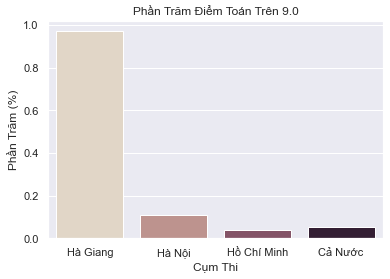

In [31]:
Compare_Toan_df = pd.DataFrame(data = {'CỤM': Cum, 'Phần Trăm': MathScore})
Compare_Toan_df

g = sns.barplot(x="CỤM", y= "Phần Trăm", palette="ch:.25", data=Compare_Toan_df)
g.set_title("Phần Trăm Điểm Toán Trên 9.0")
g.set(xlabel = "Cụm Thi", ylabel = "Phần Trăm (%)")

**Nhận xét:** Nhìn vào biểu đồ, ta thấy rõ có sự bất ổn của điểm toán ở cụm thi Hà Giang, đồng thời ta đã nhận xét ở trên sức học của cụm thi này không vượt trội so với Hà Nội, Hồ Chí Minh, và cả nước. Tuy nhiên, để rõ ràng, ta sẽ kiểm tra thêm phổ điểm theo phần trăm của cả cụm thi so với cả nước.

#### Phần Trăm Điểm Toán Cụm Hà Giang Và Cả Nước

In [32]:
def makePercentDF(df,subject):
    subjectDF = pd.DataFrame(df[subject].value_counts()/(df[subject].count()))
    subjectDF = subjectDF.sort_index()
    subjectDF = subjectDF[subject]
    subjectDF = pd.DataFrame(subjectDF)
    subjectDF.reset_index(inplace=True)
    subjectDF = subjectDF.rename(columns = {'index':'DIEM'})
    subjectDF.columns = ['DIEM','PHAN TRAM']
    subjectDF['PHAN TRAM'] = subjectDF['PHAN TRAM']*100
    return subjectDF

In [33]:
HG_Math_df = makePercentDF(df_HaGiang,'TOÁN')
All_Math_df = makePercentDF(df,'TOÁN')
All_Math_df['PHAN TRAM'].sum()

100.0

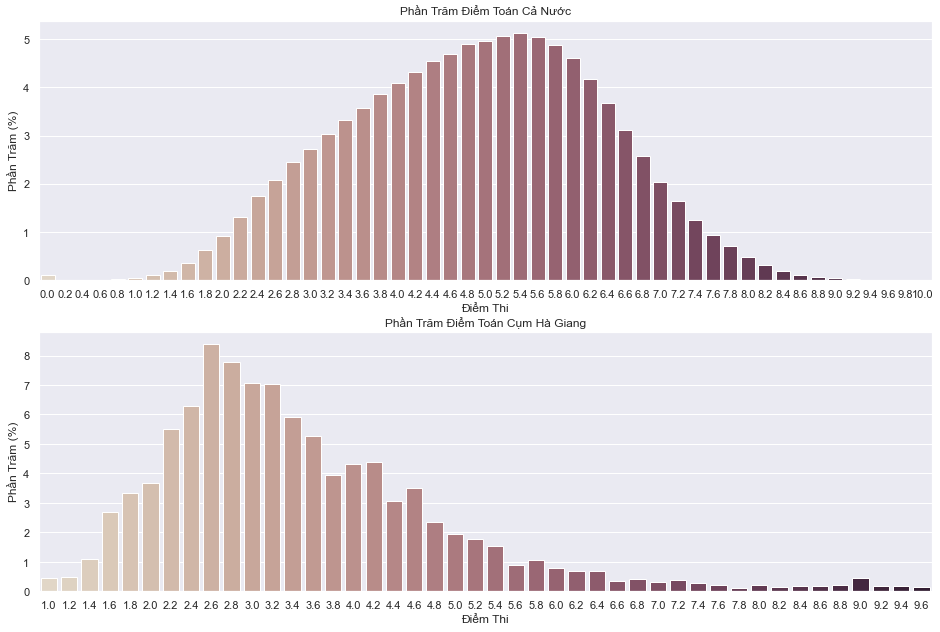

In [34]:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(16, 10.5)
# plt.figure(figsize=(16,4))

g1 = sns.barplot(x="DIEM", y= "PHAN TRAM", palette="ch:.25", data=All_Math_df,ax = axs[0])
g1.set_title("Phần Trăm Điểm Toán Cả Nước")
g1.set(xlabel = "Điểm Thi", ylabel = "Phần Trăm (%)")

g = sns.barplot(x="DIEM", y= "PHAN TRAM", palette="ch:.25", data=HG_Math_df,ax = axs[1])
g.set_title("Phần Trăm Điểm Toán Cụm Hà Giang")
g.set(xlabel = "Điểm Thi", ylabel = "Phần Trăm (%)")

plt.show()

Ta thử vẽ lại hai biểu đồ trên, dưới dạng phổ điểm tính theo số lượng với Tableau

**Phổ điểm môn Toán cả nước**

<center><img src="picture/Phổ_điểm_môn_toán_cả_nước.png"
     alt="M_All"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>

**Phổ điểm môn toán ở Hồ Chí Minh**

<center><img src="picture/Phổ_điểm_môn_toán_HCM.png"
     alt="Phổ điểm môn toán HCM"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>

**Phổ điểm môn Toán ở Hà Giang**

<center><img src="picture/Phổ_điểm_môn_toán_Hà_Giang.png"
     alt="Phổ điểm môn toán Hà Giang"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>

**Nhận xét**:
 - Ta Thấy phổ điểm Toán tính theo phần trăm của cả nước đạt cực đại ở điểm 5.4 và sau đó dần dần hạ thấp xuống, có thể thấy điều này cũng được thể hiện ở bảng [Phân bố điểm của cả nước](#Phân-bố-điểm-của-cả-nước)
 
 - Phổ điểm của Tp.HCM và cả nước gần như tương đồng nhau và phân phối trên là hợp lí. Vì số lượng thí sinh đạt điểm cao phải ít hơn số sinh viên có điểm thấp hơn.
 
 - Trong khi đó với phổ điểm Toán tính theo phần trăm cụm thi Hà Giang, cực đại ở điểm 2.6, trung vị thấp hơn cả nước (3.2 so với 5.0), chứng tỏ cụm thi này có sức học môn toán yếu hơn so với trung bình chung cả nước.
 
 - Tuy nhiên, ta lại thấy phần trăm điểm 9.0 của cụm thi này cao bất thường, thậm chí là số điểm có phần trăm cao nhất trong khoảng điểm từ 6.6 đến 9.6 của cụm, và cao hơn cả phần trăm điểm 8.4 của cả nước.

#### Phân bố điểm và outlier của Hà Giang và một số tỉnh phía Bắc bằng biểu đồ hộp

Ta chỉ quan tâm đến những outlier cao bất thường (không quan tâm những outlier thấp)  
</br>

##### Phân bố điểm môn Văn

<center><img src="picture/Phân_bố_điểm_môn_văn_giữa_một_vài_tỉnh_bằng_biểu_đồ_hộp.png"
     alt="Phân bố điểm môn văn giữa một vài tỉnh bằng biểu đồ hộp"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>

**Nhận xét:**
- Về điểm môn văn, ta có thể thấy Hà Giang không có số outlier đáng kể. Tuy nhiên trung vị của cụm thi này thấp hơn rất nhiều so với các tỉnh phía Bắc khác (Khoảng 4.2 ở Hà Giang và 6.5 ở Hà Nam). Qua đó lại càng khẳng định hơn nữa về việc học tập ở tỉnh này kém hơn các tỉnh khác.  

</br>

##### Phân bố điểm môn Toán

<center><img src="picture/Phân_bố_điểm_môn_toán_giữa_một_vài_tỉnh_bằng_biểu_đồ_hộp.png"
     alt="Phân bố điểm môn toán giữa một vài tỉnh bằng biểu đồ hộp"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>

##### Phân bố điểm môn lý

<center><img src="picture/Phân_bố_điểm_môn_lý_giữa_một_vài_tỉnh_bằng_biểu_đồ_hộp.png"
     alt="Phân bố điểm môn lý giữa một vài tỉnh bằng biểu đồ hộp"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>

**Nhận xét:**
- Qua các biểu đồ trên, một lần nữa Hà Giang lại có trung vị thấp nhất và số lượng outlier nhiều nhất
- Ta thấy Điện Biên cũng có số lượng outlier ở môn Toán cũng khá lớn. Nhưng ở bài tập này nhóm em sẽ tập trung phân tích cụm thi Hà Giang

#### Tiếp theo ta quan sát phổ điểm môn Lý của Hà Giang  
</br>

<center><img src="picture/Phổ_điểm_môn_lý_Hà_Giang.png"
     alt="Phổ điểm môn lý Hà Giang"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>
<p><center>Phổ điểm môn lý cụm thi Hà Giang</center></p>
</br>

<center><img src="picture/Phổ_điểm_môn_hóa_của_các_sinh_viên_trên_9_điểm_môn_lý.png"
     alt="Phổ điểm môn Hóa của các sinh viên trên 9 điểm môn lý.png"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>
<p><center>Phổ điểm môn Hóa của các thí sinh có môn lý trên 9 điểm</center></p>
</br>

<center><img src="picture/Phổ_điểm_môn_toán_của_các_sinh_viên_trên_9_điểm_môn_lý.png"
     alt="Phổ điểm môn Toán của các sinh viên trên 9 điểm môn lý.png"
     style="float: center; margin-right: 10px;" 
     width="600" height="300"/></center>
<p><center>Phổ điểm môn Toán của các thí sinh trên 9 điểm môn lý</center></p>
</br>

**Nhận xét:**
- Phổ điểm mô Lý của cụm thi này cũng bất thường như phổ điểm môn Toán.
- 2 biểu đồ trên cho ta thấy có các thí sinh trên 9 điểm môn Lý nhưng lại 2.2 hay 2.4 điểm môn Hóa, hoặc có số điểm thấp tương tự ở môn Toán. Đều này là rất bất thường vì học sinh giỏi Lý thì thường giỏi Toán hoặc Hóa.

</br>

#### Phần Trăm Điểm Các Khối Trên 27

Ta thử vẽ phần trăm điểm của các khối A, B, C, D, A1 có trên 27 điểm.

In [36]:
PhanTramKhoi = np.random.uniform((1*2), size = (4,5))
PhanTramKhoi

array([[1.5730366 , 1.6688956 , 1.9677205 , 1.8253745 , 1.02592429],
       [1.46424452, 1.50819937, 1.2442348 , 1.08359784, 1.41361525],
       [1.63978609, 1.97731346, 1.3476469 , 1.25310563, 1.58392992],
       [1.30170697, 1.23399808, 1.59944251, 1.56794602, 1.76615882]])

In [37]:
for i in range(4):
    for j in range(5):
#         print(KhoiThi[j])
        PhanTramKhoi[i][j] = findPercentScoreHighgerThan(dfArr[i],27,KhoiThi[j])
PhanTramKhoi_df = pd.DataFrame(PhanTramKhoi.T)
PhanTramKhoi_df.columns = Cum
PhanTramKhoi_df['Khối'] = KhoiThi

print(PhanTramKhoi_df)

   Hà Giang    Hà Nội  Hồ Chí Minh   Cả Nước     Khối
0  2.753873  1.183244     0.509831  0.975151   KHỐI A
1  3.157895  1.153006     0.452562  0.818182   KHỐI B
2  5.007474  2.045463     0.990868  1.858213   KHỐI C
3  4.294693  1.330941     0.369561  1.494482   KHỐI D
4  2.613240  1.117186     0.506145  1.017064  KHỐI A1


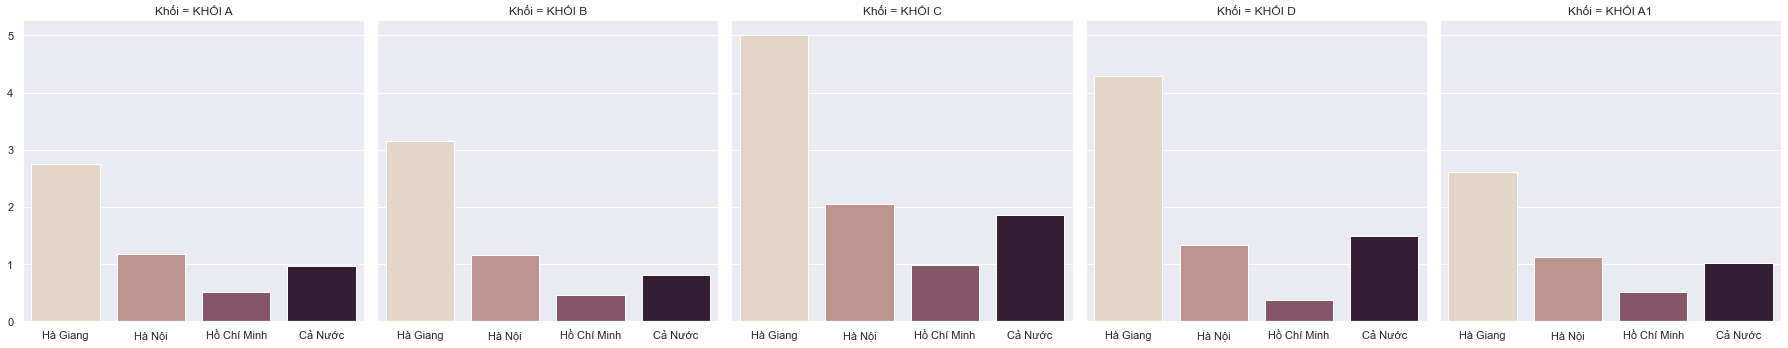

In [38]:
sns.catplot(kind = 'bar', palette="ch:.25", data=PhanTramKhoi_df, col = 'Khối')
# snd

**Nhận xét:** Phần trăn điểm trên 27 điểm của các khối cụm thi Hà Giang cao hơn hẳn so với cả nước và hai cụm Hà Nội, TP. Hồ Chí Minh dù lực học không vượt trội hơn.

## Kết luận


Từ nhận xét của năm phần sau:
- [Phần Trăm Điểm Toán Trên 9.0](#Phần-Trăm-Điểm-Toán-Trên-9.0)
- [Phần Trăm Điểm Toán Cụm Hà Giang Và Cả Nước](#Phần-Trăm-Điểm-Toán-Trên-9.0)
- [Phân bố điểm và outlier của Hà Giang và một số tỉnh phía Bắc bằng biểu đồ hộp](#Phân-bố-điểm-và-outlier-của-Hà-Giang-và-một-số-tỉnh-phía-Bắc-bằng-biểu-đồ-hộp)
- [Phổ điểm môn Lý của Hà Giang](#Tiếp-theo-ta-quan-sát-phổ-điểm-môn-Lý-của-Hà-Giang)
- [Phần Trăm Điểm Các Khối Trên 27](#Phần-Trăm-Điểm-Các-Khối-Trên-27)

Ta có thể kết luận: Cụm thi Hà Giang có khả năng cao gian lận điểm trong kỳ thi THPT QG 2018.